<a href="https://colab.research.google.com/github/majeedhussain49/testing_colab/blob/master/notebooks/Classifier_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resnet18

Uncomment the below cell if you are running this notebook in colab

In [1]:
#!pip install keras
#!pip install matplotlib
#!pip install opencv-python
#!pip install Pillow
#!pip install numpy
#!pip install scikit-learn
#!pip install git+https://github.com/raghakot/keras-vis.git 
#!pip install git+https://github.com/totti0223/lucid4keras.git 
#!pip install coremltools
#!pip install imutils
#!pip install image-classifiers

In [8]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten,Dropout
from keras.optimizers import Adam, RMSprop,SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [9]:
#Assigning paths
train_path = '../Dataset/train/'
valid_path = '../Dataset/validation/'
test_path = '../Dataset/test/'

Uncomment the below cell if you are running this notebook in colab, you have to upload the Dataset folder in your google drive and later run the following cells to access all the data in your colab.

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [3]:
#Assigning paths
#train_path = '/content/Dataset/train/'
#valid_path = '/content/Dataset/validation/'
#test_path = '/content//Dataset/test/'

In [10]:
#Generating batches using ImageDataGenerator
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(256,256),classes=['Black_Measles','Blackrot','Isariopsis',"MDB_disease","No_disease","mildiou","Spyder"], batch_size = 32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(256,256),classes = ['Black_Measles','Blackrot','Isariopsis',"MDB_disease","No_disease","mildiou","Spyder"],batch_size =10)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(256,256),classes=['Black_Measles','Blackrot','Isariopsis',"MDB_disease","No_disease","mildiou","Spyder"],batch_size=10)

Found 11200 images belonging to 7 classes.
Found 2800 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [11]:
RadioButton# plotting images with labels
def plots(ims, figsize=(12,6), rows=2, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1]!=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation = None if interp else 'none')

In [5]:
imgs,labels = next(train_batches)

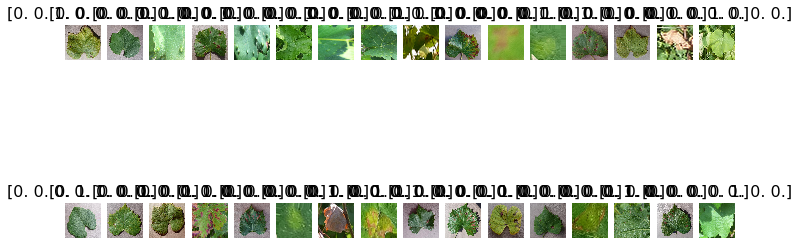

In [6]:
plots(imgs,titles=labels)

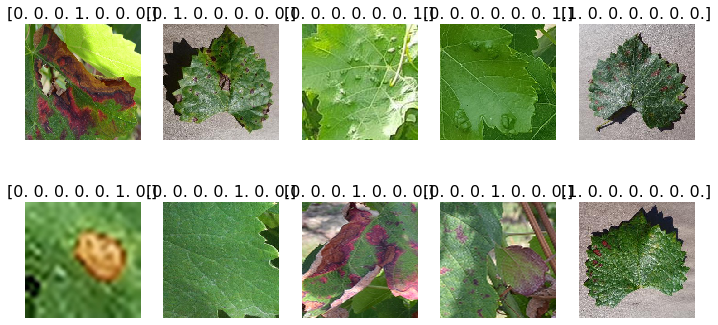

In [7]:

test_imgs,test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [12]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
       rotation_range=20,
       width_shift_range=0.2,
       height_shift_range=0.2,
       horizontal_flip=True,
       fill_mode='nearest'
)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32
test_batchsize = 10
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(256, 256),
        batch_size=train_batchsize,
        classes =['Black_Measles','Blackrot','Isariopsis',"MDB_disease","No_disease","Spyder","mildiou"]
        )
 
validation_generator = validation_datagen.flow_from_directory(
        valid_path,
        target_size=(256, 256),
        batch_size=val_batchsize,
        classes=['Black_Measles','Blackrot','Isariopsis',"MDB_disease","No_disease","Spyder","mildiou"]
        ,
        shuffle=True)
test_generator = validation_datagen.flow_from_directory(test_path,
        target_size=(256, 256),
        batch_size=val_batchsize,
        classes =['Black_Measles','Blackrot','Isariopsis',"MDB_disease","No_disease","Spyder","mildiou"]
        ,
        shuffle=False)

Found 11200 images belonging to 7 classes.
Found 2800 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [39]:
from classification_models.keras import Classifiers


ResNet18, preprocess_input = Classifiers.get('resnet18')

n_classes = 7

# build model
base_model = ResNet18(input_shape=(256,256,3), weights='imagenet', include_top=False)
#headModel = base_model.output
#headModel = Flatten(name="flatten")(headModel)
#headModel = Dense(512, activation="relu")(headModel)
#headModel = Dropout(0.5)(headModel)
#headModel = Dense(128, activation="relu")(headModel)
#headModel = Dropout(0.5)(headModel)
#headModel = Dense(7, activation="softmax")(headModel)
#model = keras.models.Model(inputs=base_model.input, outputs=headModel)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])


In [33]:
for layer in base_model.layers:
    layer.trainable = False

In [40]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_91 (ZeroPadding2 (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d_91[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [41]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fec707b3a90> False
<keras.layers.normalization.BatchNormalization object at 0x7fec707b3ac8> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fec707b3c88> True
<keras.layers.convolutional.Conv2D object at 0x7fec706f07b8> True
<keras.layers.normalization.BatchNormalization object at 0x7fec97763240> True
<keras.layers.core.Activation object at 0x7fec97763908> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fec97714240> True
<keras.layers.pooling.MaxPooling2D object at 0x7fec976fc710> True
<keras.layers.normalization.BatchNormalization object at 0x7fec976d3860> True
<keras.layers.core.Activation object at 0x7fec976d31d0> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fec975bdb38> True
<keras.layers.convolutional.Conv2D object at 0x7fec9758fcc0> True
<keras.layers.normalization.BatchNormalization object at 0x7fec9756c208> True
<keras.layers.core.Activation object at 0x7fec9756c898> True
<keras.layers.convo

In [16]:
import os
import datetime
logdir = os.path.join("logtf2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1, batch_size=32, write_graph=True, write_grads=False, write_images=True, embeddings_freq=1, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=train_generator, update_freq='epoch')


In [42]:
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [43]:
# Save the model according to the conditions  
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

checkpoint = ModelCheckpoint("resnet18.h5", monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [48]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,initial_epoch=25,epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1, callbacks=([early,checkpoint]))

Epoch 26/50
350/350 [==============================] - 172s 492ms/step - loss: 0.0455 - acc: 0.9861 - val_loss: 0.0840 - val_acc: 0.9718

Epoch 00026: loss did not improve from 0.04295
Epoch 27/50
350/350 [==============================] - 180s 515ms/step - loss: 0.0378 - acc: 0.9893 - val_loss: 0.0854 - val_acc: 0.9729

Epoch 00027: loss improved from 0.04295 to 0.03779, saving model to resnet18.h5
Epoch 28/50
350/350 [==============================] - 181s 517ms/step - loss: 0.0392 - acc: 0.9887 - val_loss: 0.0885 - val_acc: 0.9725

Epoch 00028: loss did not improve from 0.03779
Epoch 29/50
350/350 [==============================] - 181s 517ms/step - loss: 0.0370 - acc: 0.9895 - val_loss: 0.0881 - val_acc: 0.9721

Epoch 00029: loss improved from 0.03779 to 0.03702, saving model to resnet18.h5
Epoch 30/50
350/350 [==============================] - 181s 518ms/step - loss: 0.0342 - acc: 0.9896 - val_loss: 0.0876 - val_acc: 0.9714

Epoch 00030: loss improved from 0.03702 to 0.03419, savi

In [50]:
import pickle

# save the model to disk
filename = 'resnet18.sav'
pickle.dump(model, open(filename, 'wb'))

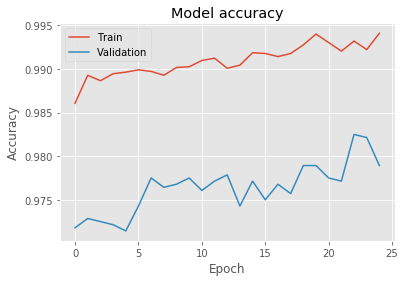

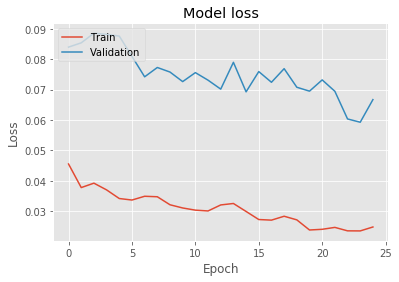

In [102]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [105]:
print("[INFO] evaluating after fine-tuning network...")
test_generator.reset()
pred = model.predict_generator(test_generator)
pred = np.argmax(pred, axis=1)
print(classification_report(test_generator.classes, pred,target_names=test_generator.class_indices.keys()))
 

[INFO] evaluating after fine-tuning network...
               precision    recall  f1-score   support

Black_Measles       0.91      1.00      0.95        10
     Blackrot       1.00      1.00      1.00        10
   Isariopsis       1.00      1.00      1.00        10
  MDB_disease       1.00      0.90      0.95        10
   No_disease       1.00      1.00      1.00        10
       Spyder       1.00      1.00      1.00        10
      mildiou       1.00      1.00      1.00        10

     accuracy                           0.99        70
    macro avg       0.99      0.99      0.99        70
 weighted avg       0.99      0.99      0.99        70



In [3]:
#Load model and plot confusion matrix

from keras.models import load_model
import numpy as np
import imutils
from PIL import Image
import cv2

model = load_model('../saved_models/resnet18.h5')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_91 (ZeroPadding2 (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d_91[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [16]:
#Simple program to plot confusion matrix (you can find this in scikit learn documentation)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [26]:
#predict
Prediction = model.predict_generator(test_generator,steps=3)

In [29]:
cm = confusion_matrix(test_generator.classes,Prediction.argmax(axis=1))

Confusion matrix, without normalization
[[10  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 1  0  0  9  0  0  0]
 [ 0  0  0  0 10  0  0]
 [ 0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0 10]]


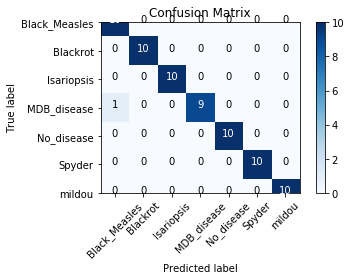

In [30]:
cm_plot_labels = ['Black_Measles','Blackrot','Isariopsis',"MDB_disease","No_disease","Spyder","mildou"]
plot_confusion_matrix(cm,cm_plot_labels,title = 'Confusion Matrix')

# Testing on the image 

In [40]:
# load the input image and then clone it so we can draw on it later
image = cv2.imread('../Dataset/test/Spyder/1_spyder134 resized.jpg')
output = image.copy()
output = imutils.resize(output, width=400)
 
# our model was trained on RGB ordered images but OpenCV represents
# images in BGR order, so swap the channels, and then resize to
# 224x224 (the input dimensions for VGG16)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (256, 256))

imgage = np.reshape(image,[1,256,256,3]) 
image = imgage.astype("float32")/255

In [41]:
#Predictions

preds = model.predict(image)


In [43]:
classes =['Black_Measles','Blackrot','Isariopsis',"MDB_disease","No_disease","Spyder","mildiou"]

In [44]:
#labels
i = np.argmax(preds)
label = classes[i]


In [45]:
# draw the prediction on the output image
text = "{}: {:.2f}%".format(label, preds.item(i) * 100)
cv2.putText(output, text, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 255), 2)
# show the output image
cv2.imshow("Output", output)
cv2.waitKey(0)
cv2.destroyAllWindows()

/home/majeed/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/majeed/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


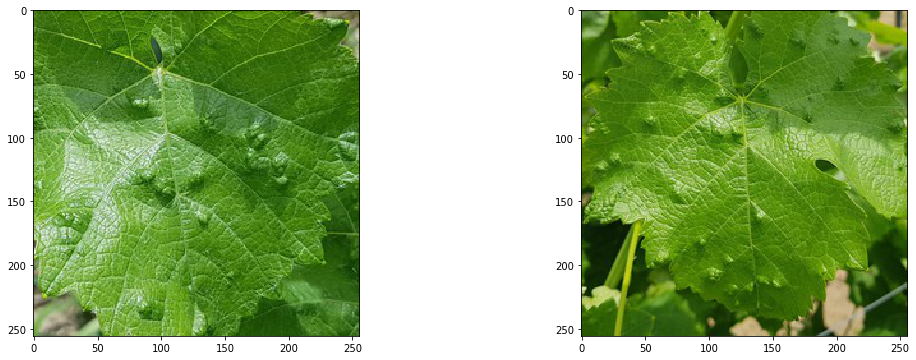

In [22]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img('../Dataset/test/Spyder/1_spyder119 resized.jpg', target_size=(256, 256))
img2 = utils.load_img('../Dataset/test/Spyder/1_spyder111 resized.jpg', target_size=(256, 256))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

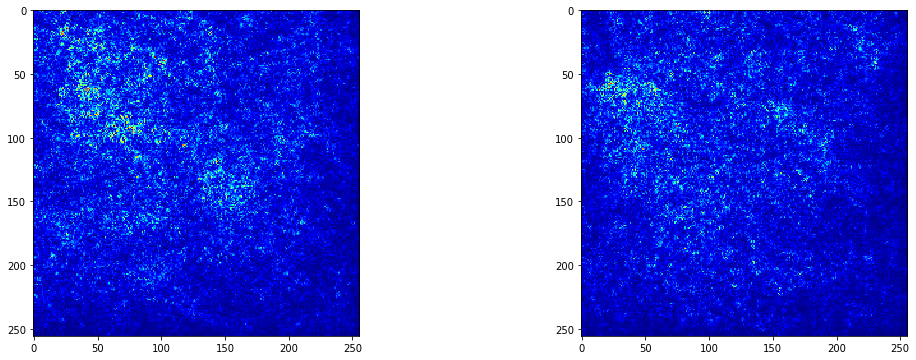

In [24]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_10')

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    # 5 is the imagenet index corresponding to `ouzel`
    grads = visualize_saliency(model, layer_idx, filter_indices=5, seed_input=img)
    
    # visualize grads as heatmap

    ax[i].imshow(grads, cmap='jet')

<Figure size 1296x432 with 0 Axes>

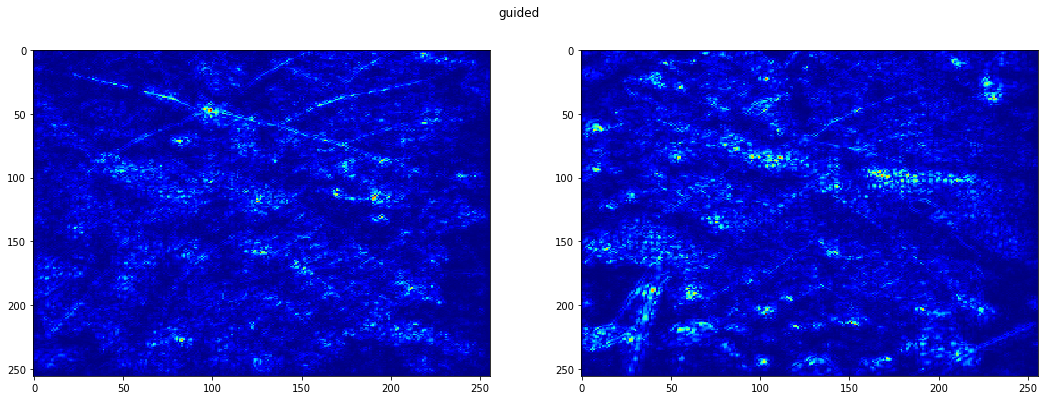

<Figure size 1296x432 with 0 Axes>

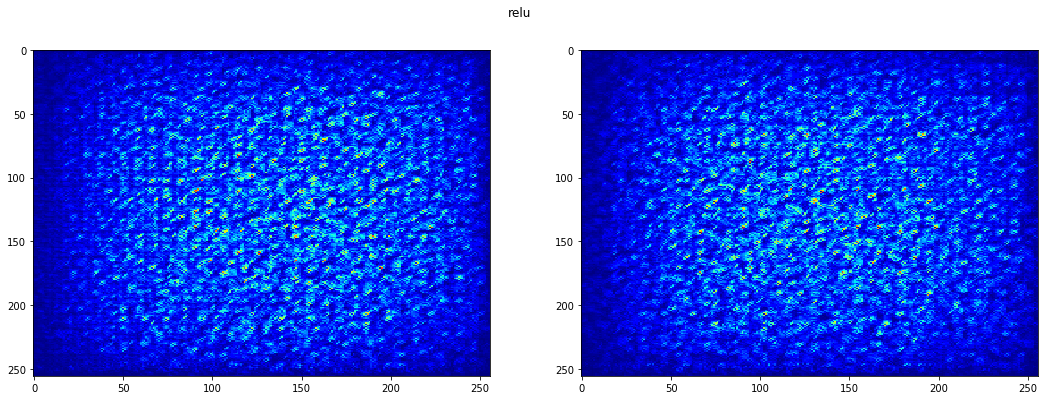

In [25]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=5, 
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet',interpolation='nearest', aspect='auto')

<Figure size 1296x432 with 0 Axes>

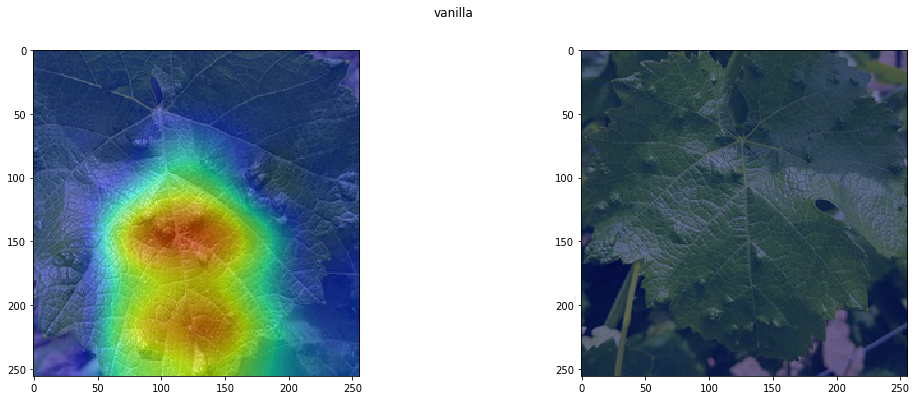

<Figure size 1296x432 with 0 Axes>

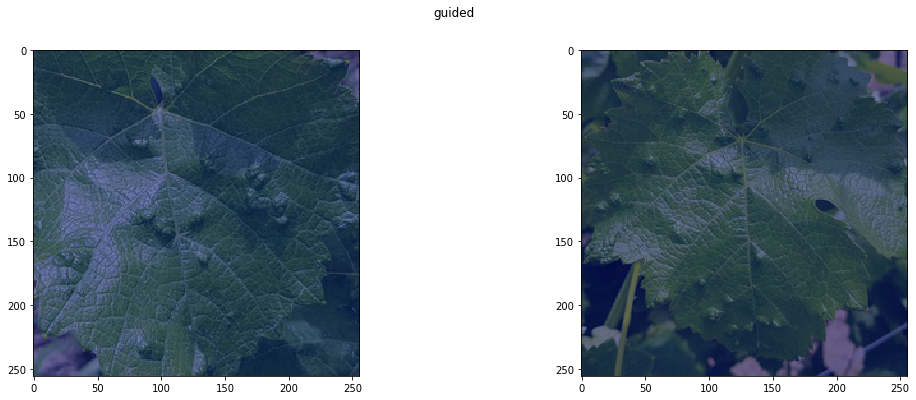

<Figure size 1296x432 with 0 Axes>

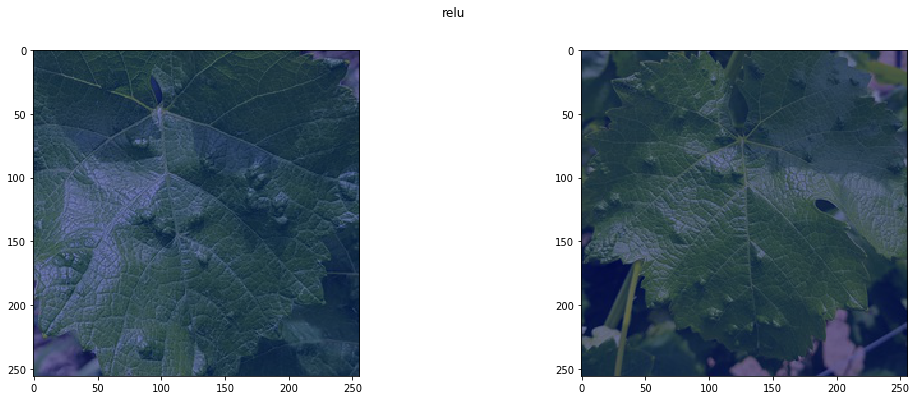

In [26]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=5, 
                              seed_input=img, backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

# Testing the model on webcam

In [67]:
# Testing 
classes =['Black_Measles','Blackrot','Isariopsis',"MDB_disease","No_disease","Spyder","mildiou"]
video = cv2.VideoCapture(0)

while True:
        _, frame = video.read()

        #Convert the captured frame into RGB
        
        output = frame.copy()
        output = imutils.resize(output, width=400)
 
# our model was trained on RGB ordered images but OpenCV represents
# images in BGR order, so swap the channels, and then resize to
# 224x224 (the input dimensions for VGG16)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256))

        image = np.reshape(image,[1,256,256,3]) 
        image = image.astype("float32")/255
        
        preds = model.predict(image)

        #label
        i = np.argmax(preds)
        label = classes[i]

        # draw the prediction on the output image
        text = "{}: {:.2f}%".format(label, preds.item(i) * 100)
        cv2.putText(output, text, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 255), 2)
        # show the output image
        cv2.imshow("Output", output)
        key = cv2.waitKey(1)
        if key ==ord('q'):
            break

video.release()
cv2.destroyAllWindows()      


In [1]:
#from keras.applications import VGG16

#from vis.losses import ActivationMaximization
#from vis.regularizers import TotalVariation, LPNorm
#from vis.input_modifiers import Jitter
#from vis.optimizer import Optimizer
#from vis.callbacks import GifGenerator

# Build the VGG16 network with ImageNet weights
#model = VGG16(weights='imagenet', include_top=True)
#print('Model loaded.')

# The name of the layer we want to visualize
# (see model definition in vggnet.py)
#layer_name = 'dense_10'
#layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
#output_class = [1]

#losses = [
#    (ActivationMaximization(layer_dict[layer_name], output_class), 2),
#    (LPNorm(model.input), 10),
#    (TotalVariation(model.input), 10)
#]
#opt = Optimizer(model.input, losses)
#opt.minimize(max_iter=500, verbose=True, input_modifiers=[Jitter()], callbacks=[GifGenerator('opt_progress')])